In [8]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
model = VGG16(weights='imagenet', include_top=False)
model.summary()

img_path = 'test/01.png'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)

print (vgg16_feature.shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [15]:
vgg16_feature_np = np.array(vgg16_feature)
vgg16_feature_f = vgg16_feature_np.flatten()
print(vgg16_feature_f.shape)

(25088,)


In [19]:
model2 = VGG16(weights='imagenet', include_top=True)
#model2.summary()

img_path = 'test/03.png'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature2 = model2.predict(img_data)

print (vgg16_feature2.shape)

(1, 1000)


In [20]:
model_extractfeatures = Model(input=model2.input, output=model2.get_layer('fc2').output)
fc2_features = model_extractfeatures.predict(img_data)
print(fc2_features.shape)
fc2_features = fc2_features.reshape((4096,1))
print(fc2_features.shape)

(1, 4096)
(4096, 1)


/home/sol/.virtualenvs/maskrcnn/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fc...)`
  """Entry point for launching an IPython kernel.


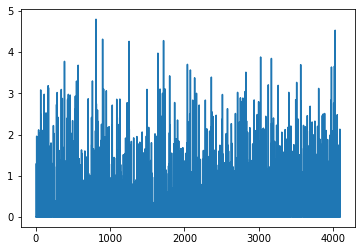

In [9]:
plt.plot(fc2_features)
plt.show()

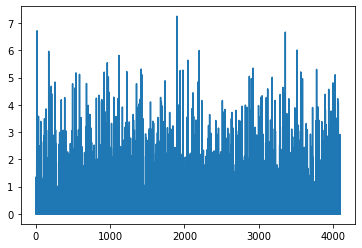

In [13]:
plt.plot(fc2_features)
plt.show()

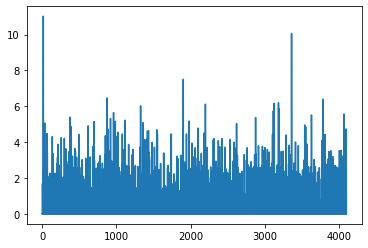

In [18]:
plt.plot(fc2_features)
plt.show()

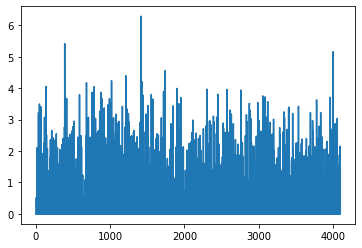

In [21]:
plt.plot(fc2_features)
plt.show()

In [13]:
print(vgg16_feature2[0])

[2.03104559e-04 1.04009014e-04 1.86101344e-04 1.04513631e-04
 1.77805035e-04 4.77893540e-04 2.17440375e-03 2.76478328e-04
 2.30612830e-04 8.02150826e-05 4.97995497e-05 1.08465592e-05
 8.39674103e-05 2.48040829e-04 1.65842386e-04 1.44940292e-04
 1.35289767e-04 1.86866251e-04 6.37680714e-05 3.34004057e-04
 6.43017847e-05 1.01954654e-04 5.25760624e-05 3.00415792e-04
 2.40686655e-04 1.03383667e-04 2.22832939e-04 3.36215278e-04
 6.73851871e-04 2.99281266e-04 8.96932324e-05 6.15060271e-05
 4.09573520e-04 5.56037761e-04 1.30988052e-03 1.29401567e-04
 9.14233853e-04 1.48900945e-04 1.72205240e-04 1.04056038e-04
 5.96478021e-05 1.78268310e-04 5.72639619e-05 2.14476982e-04
 3.98057629e-04 5.47781994e-04 4.85580385e-05 7.71568375e-05
 1.59947031e-05 1.60297859e-04 8.83237284e-04 4.04267521e-05
 3.28632392e-04 2.58294080e-04 2.63988506e-04 3.87209693e-05
 3.96527117e-04 8.48970885e-05 8.56556944e-05 8.63645182e-05
 4.98885813e-04 3.68053064e-04 2.68093019e-04 1.00989659e-04
 5.44796530e-05 6.719650

In [ ]:
2.15291366e-04 3.03620036e-04 9.78859025e-04 8.66963819e-04

In [5]:
model3 = VGG16(weights='imagenet', include_top=True)
model3.layers.pop()
model3.summary()

img_path = 'test/01.png'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature3 = model3.predict(img_data)

print (vgg16_feature3.shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

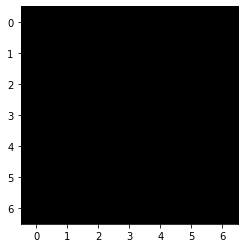

In [10]:
import pylab
model4 = VGG16(weights='imagenet', include_top=False)
model4.summary()

img_path = 'test/01.png'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature4 = model4.predict(img_data)

print (vgg16_feature4.shape)

#features = model.predict(x)
pic=vgg16_feature4[0,:,:,128]
pylab.imshow(pic)
pylab.gray()
pylab.show()

In [3]:
print (vgg16_feature.shape)


(1, 1000)


In [ ]:
from keras.applications import vgg16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

img_path = '1.png'
img = image.load_img(img_path, target_size=(224, 224))
model = vgg16.VGG16(weights='imagenet', include_top=True)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
features = model.predict(x)
model_extractfeatures = Model(input=model.input, output=model.get_layer('fc2').output)
fc2_features = model_extractfeatures.predict(x)
fc2_features = fc2_features.reshape((4096,1))
#np.savetxt('fc2.txt',fc2_features)
#plt.plot(fc2_features)
#plt.show()